# **Deep Learning Project: Street View Housing Number Digit Recognition**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [3]:

import numpy as np

# A library for data visualization
import matplotlib.pyplot as plt

# An advanced library for data visualization
import seaborn as sns
sns.set()

import tensorflow as tf
from tensorflow import keras


# Keras Sequential Model
from keras.models import Sequential

# Importing all the different layers and optimizers
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, Activation, LeakyReLU
from keras import optimizers
from keras.optimizers import Adam
from keras.utils import to_categorical

**Let us check the version of tensorflow.**

In [4]:
# prompt:  check the version of tensorflow.

print(tf.__version__)


2.12.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [5]:
# Parent directory where images are stored in drive
file_dir = '/content/drive/MyDrive/ML and AI MIT LEARNING/Elective project -- Deep Learning/SVHN_single_grey1.h5'

In [6]:
import h5py
# Open the file as read only
h5f = h5py.File(file_dir, 'r')


In [ ]:
h5f.keys()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>

In [7]:
# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

#close this file:
h5f.close()

Check the number of images in the training and the testing dataset.

In [8]:
print(X_train.shape[0], y_test.shape[0])

42000 18000


In [9]:
# prompt: unique numbers in y_train

np.unique(y_train)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

**Observation:**
There are 42000 images in the training dataset, 18000 images in the testing dataset.


## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

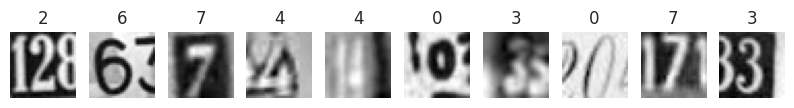

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [10]:
# visualizing the first 10 images in the dataset and their labels
fig = plt.figure(figsize=(10, 1))

for i in range(10):
    ax = fig.add_subplot(1, 10, i+1)
    ax.imshow(X_train[i], cmap="gray") # write the function to visualize images
    ax.set_title(y_train[i])
    plt.axis('off')

plt.show()
print('label for each of the above image: %s'  % (y_train[0:10]))

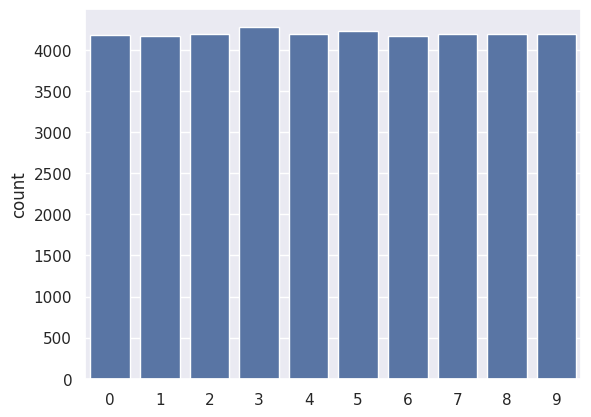

In [11]:
# Plot distribution of each category
count_plot = sns.countplot(x=y_train)

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape of the images and the first image

print("Shape:", X_train[0].shape)
print("First image:\n", X_train[0])

Shape: (32, 32)
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


### **Normalize the train and the test data**

In [ ]:
X_train_new= X_train.reshape((X_train.shape[0], 1024))
X_test_new = X_test.reshape((X_test.shape[0], 1024))
X_train = X_train_new/255.0
X_test= X_test_new/255.0

#X_train_normalized

Print the shapes of Training and Test data

In [ ]:
print('Shape of training set:',X_train.shape,y_train.shape)

print('Shape of Test set:', X_test.shape, y_test.shape)

Shape of training set: (42000, 1024) (42000,)
Shape of Test set: (18000, 1024) (18000,)


### **One-hot encode output**

In [ ]:
#Write the function and appropriate variable name to one-hot encode the output
from keras.utils import to_categorical

y_train_encoded= to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print('y_train one-hot encode:\n', y_train_encoded, '\n shape:', y_train_encoded.shape)

#test labels
print('')
print('y_train lable:', y_train, '\n shape:', y_train.shape)

y_train one-hot encode:
 [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 shape: (42000, 10)

y_train lable: [2 6 7 ... 7 0 4] 
 shape: (42000,)


**Observation:**
Notice now each entry of y_test and y_train is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
#Clearing the backend
from keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
nn_model_1 = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 64.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
nn_model_1.add(Dense(activation = 'relu', input_dim = 1024, units=64))
#Add 2nd hidden layer
nn_model_1.add(Dense(32, activation='relu'))
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 10 node, which is the the desired dimensions of our output
# We use the softmax because we want probability outcomes
nn_model_1.add(Dense(10, activation = 'softmax'))

# Create optimizer with default learning rate

optimizers.Adam(learning_rate=0.001)
# Compile the model
nn_model_1.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

nn_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# fit model:

history_model_1=nn_model_1.fit(X_train, y_train_encoded,
          validation_split=0.2,
          epochs=20,
          batch_size=128,verbose=1)


#history_model_1 = model_1.fit(X_train, y_train, epochs=20, validation_split=0.2, batch_size=128, verbose = 1)

Epoch 1/20
263/263 [==============================] - 2s 5ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 1s 4ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 1s 4ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 2s 7ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 2s 8ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 2s 6ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

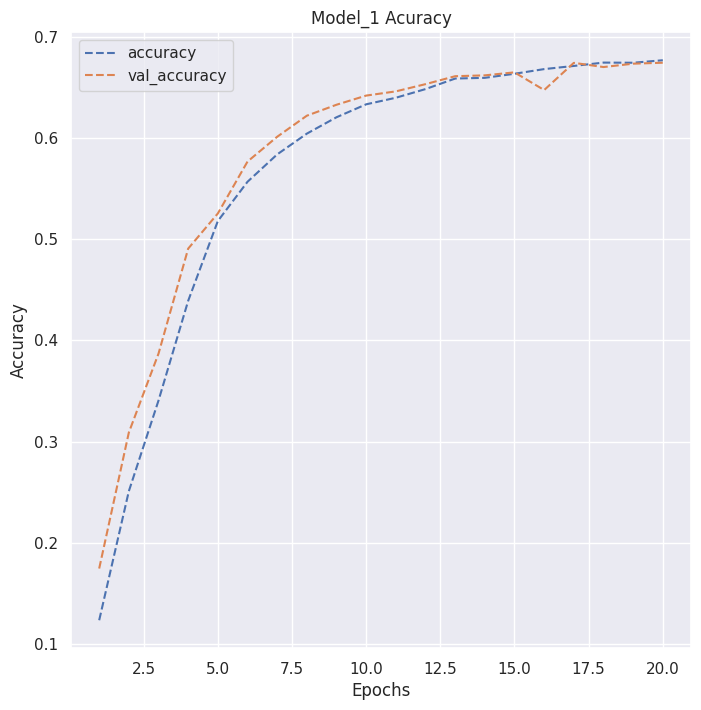

In [ ]:
# plotting the accuracies

dict_hist = history_model_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Model_1 Acuracy')
plt.legend()
plt.show()

**Observations:**

* Both training and validation set demostrate similar acuracy, indicating the model is not overfitting the training dataset.
* Both of the accuracies of training and validation dataset increase steadily until epoch 6, then they increase in a slower rate until epoch 17 / epoch 18.
* We observe that the accuracy of the validation dataset is silightly higher than the trainign dataset until epoch 15. And after that, the training dataset starts to demostrate higher accuracy, while the validation dataset demonstrates a decrease on epoch 16 and increases again till the end.
* Overall, the model does not show overfitting, given training set accuracy of 0.68 and validation set accuracy of 0.67.

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing the backend
from keras import backend
backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
nn_model_2 = Sequential()
# The amount of nodes (dimensions) in hidden layer should be the average of input and output layers, in this case 256.
# This adds the input layer (by specifying input dimension) AND the first hidden layer (units)
nn_model_2.add(Dense(activation = 'relu', input_dim = 1024, units=256))
#Add 2nd hidden layer
nn_model_2.add(Dense(128, activation='relu'))

# add dropout layer with the rate = 0.2
nn_model_2.add(Dropout(0.2))
# add third hidden layer with 64 nodes and the relu activation
nn_model_2.add(Dense(64, activation='relu'))
# add 4th hidden layer with 64 nodes and the relu activation
nn_model_2.add(Dense(64, activation='relu'))
# add 5th hidden layer with 32 nodes and the relu activation
nn_model_2.add(Dense(32, activation='relu'))
#Add the BatchNormalization layer
nn_model_2.add(BatchNormalization())
# Adding the output layer
# Notice that we do not need to specify input dim.
# we have an output of 10 node, which is the the desired dimensions of our output
# We use the softmax because we want probability outcomes
nn_model_2.add(Dense(10, activation = 'softmax'))

# Create optimizer with default learning rate

optimizers.Adam(learning_rate=0.0005)
# Compile the model
nn_model_2.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

nn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [ ]:
# fit model:

history_model_2=nn_model_2.fit(X_train, y_train_encoded,
          validation_split=0.2,
          epochs=30,
          batch_size=128,verbose=1)


Epoch 1/30
263/263 [==============================] - 6s 16ms/step - loss: 2.3181 - accuracy: 0.1018 - val_loss: 2.3035 - val_accuracy: 0.1087
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 2.2215 - accuracy: 0.1486 - val_loss: 2.1916 - val_accuracy: 0.1640
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 1.8198 - accuracy: 0.3263 - val_loss: 1.7460 - val_accuracy: 0.3856
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 1.5167 - accuracy: 0.4671 - val_loss: 1.3700 - val_accuracy: 0.5388
Epoch 5/30
263/263 [==============================] - 3s 13ms/step - loss: 1.3564 - accuracy: 0.5419 - val_loss: 1.2863 - val_accuracy: 0.5650
Epoch 6/30
263/263 [==============================] - 3s 12ms/step - loss: 1.2910 - accuracy: 0.5659 - val_loss: 1.2252 - val_accuracy: 0.5975
Epoch 7/30
263/263 [==============================] - 4s 14ms/step - loss: 1.2379 - accuracy: 0.5868 - val_loss: 1.1925 - val_accuracy: 0.6052

### **Plot the Training and Validation Accuracies and write down your Observations.**

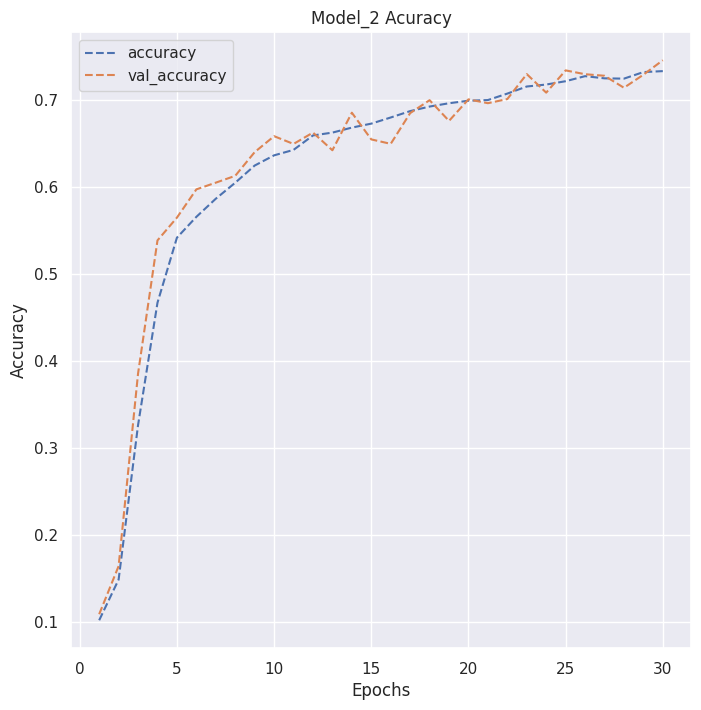

In [ ]:
# plotting the accuracies

dict_hist = history_model_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('Model_2 Acuracy')
plt.legend()
plt.show()




**Observations:**
* Both validation and training dataset demonstrate similar accuracy on the overall trend, which does not show overfitting concern.
* The model accuracy increases steadily overall before epoch 7 for both of the datasets, increases at a slower rate after epoch 10.
* Before epoch 12,  the valication set demonstrates higher accuracy than the trainig set, and after epoch 12, the accuracy of the valicdation set starts to fluctuate and the training set accuracy increases slowly and consistently.
* Overall, the current model is better than the previous model with accuracy of 0.75 comparing with 0.67 of the previous one.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
# Making predictions on the test data
y_pred_test = nn_model_2.predict(X_test)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)


563/563 [==============================] - 1s 2ms/step


'\n# Calculating the probability of the predicted class\ny_pred_test_max_probas = np.max(y_pred_test, axis = 1)\n\n\n\n\ntest_pred = model_2.predict(X_test)\n\ntest_pred = np.argmax(test_pred, axis=-1)\n#Converting each entry to single label from one-hot encoded vector\ny_test = np.argmax(y_test, axis=-1)\n'

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.77      0.78      0.77      1814
           1       0.73      0.79      0.76      1828
           2       0.76      0.77      0.76      1803
           3       0.72      0.71      0.71      1719
           4       0.74      0.83      0.78      1812
           5       0.71      0.71      0.71      1768
           6       0.74      0.78      0.76      1832
           7       0.78      0.78      0.78      1808
           8       0.77      0.65      0.71      1812
           9       0.79      0.68      0.73      1804

    accuracy                           0.75     18000
   macro avg       0.75      0.75      0.75     18000
weighted avg       0.75      0.75      0.75     18000



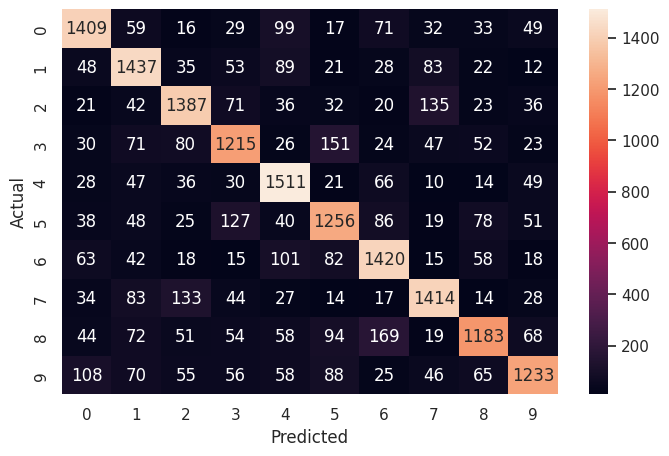

In [ ]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, y_pred_test_classes))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()



**Final Observations:**
* The confusion matrix indicates that number 4 and 7 are correctly identified beause they have the highest f1 score
* We observe that most of the classes are predicted correctly. The misclassification mostly with the number 3 and 8.
* The model has some room to improve. We found the model confused 5 with 3, 6 with 8.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
# Parent directory where images are stored in drive
file_dir = '/content/drive/MyDrive/ML and AI MIT LEARNING/Elective project -- Deep Learning/SVHN_single_grey1.h5'

In [ ]:
import h5py
# Open the file as read only
h5f = h5py.File(file_dir, 'r')

In [ ]:
print(list(h5f.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [ ]:
# Load the training and the test set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]

#close this file:
h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:**
There are 42000 images in the training dataset and 18000 images in the testing data set.

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Print the shapes of Training and Test data

In [ ]:
print(X_train[0].shape)
print('')
print(X_train[0])

(32, 32)

[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
X_train_new= X_train.reshape((X_train.shape[0], 32,32,1))
X_test_new = X_test.reshape((X_test.shape[0], 32,32,1))

In [ ]:
print('new Shape of training set:',X_train.shape,y_train.shape)

print('new Shape of Test set:', X_test.shape, y_test.shape)

new Shape of training set: (42000, 32, 32) (42000,)
new Shape of Test set: (18000, 32, 32) (18000,)


Normalize inputs from 0-255 to 0-1

In [ ]:
X_train = X_train_new/255.0
X_test= X_test_new/255.0

#X_train_normalized

Print New shape of Training and Test

In [ ]:
print('new Shape of training set:',X_train.shape,y_train.shape)

print('new Shape of Test set:', X_test.shape, y_test.shape)

new Shape of training set: (42000, 32, 32, 1) (42000,)
new Shape of Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
y_train_encoded = to_categorical(y_train)
y_test_encoded =to_categorical(y_test)

#test labels

print('y_train one-hot encode:\n', y_train_encoded, '\n shape:', y_train_encoded.shape)

#test labels
print('')
print('y_train lable:', y_train, '\n shape:', y_train.shape)

y_train one-hot encode:
 [[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 
 shape: (42000, 10)

y_train lable: [2 6 7 ... 7 0 4] 
 shape: (42000,)


**Observation:**
Notice now each entry of y_test_encoded and y_train_encoded is a one-hot encoded vector instead of a single label.

## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
from keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Build and train a CNN model as per the above mentioned architecture.**

In [ ]:
cnn_model_1 = Sequential()
#Add layers as per the architecture mentioned above in the same sequence
cnn_model_1.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
cnn_model_1.add(LeakyReLU(0.1))
cnn_model_1.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
cnn_model_1.add(LeakyReLU(0.1))
cnn_model_1.add(MaxPool2D(pool_size=(2, 2)))
cnn_model_1.add(Flatten())
cnn_model_1.add(Dense(32))
cnn_model_1.add(LeakyReLU(0.1))
cnn_model_1.add(Dense(10, activation='softmax'))
#declare adam optimizer with learning rate of 0.001
adam = optimizers.Adam(learning_rate = 0.001)

#compile the model
cnn_model_1.compile(
        loss='categorical_crossentropy',
        optimizer=adam,
        metrics=['accuracy']
    )
cnn_model_1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                        

In [ ]:
#fit model:


history_cnnmodel_1 = cnn_model_1.fit(
            X_train, y_train_encoded,
            epochs=20,
            validation_split=0.2,
            batch_size = 32,
            verbose=1)

Epoch 1/20
1050/1050 [==============================] - 71s 67ms/step - loss: 1.1274 - accuracy: 0.6303 - val_loss: 0.6497 - val_accuracy: 0.8087
Epoch 2/20
1050/1050 [==============================] - 60s 57ms/step - loss: 0.5352 - accuracy: 0.8475 - val_loss: 0.5254 - val_accuracy: 0.8448
Epoch 3/20
1050/1050 [==============================] - 77s 73ms/step - loss: 0.4416 - accuracy: 0.8700 - val_loss: 0.5049 - val_accuracy: 0.8532
Epoch 4/20
1050/1050 [==============================] - 63s 60ms/step - loss: 0.3781 - accuracy: 0.8888 - val_loss: 0.4486 - val_accuracy: 0.8739
Epoch 5/20
1050/1050 [==============================] - 80s 76ms/step - loss: 0.3330 - accuracy: 0.9004 - val_loss: 0.4592 - val_accuracy: 0.8717
Epoch 6/20
1050/1050 [==============================] - 73s 69ms/step - loss: 0.2944 - accuracy: 0.9115 - val_loss: 0.4640 - val_accuracy: 0.8735
Epoch 7/20
1050/1050 [==============================] - 62s 59ms/step - loss: 0.2622 - accuracy: 0.9216 - val_loss: 0.4506 -

### **Plot the Training and Validation Accuracies and Write your observations.**

In [ ]:
import matplotlib.pyplot as plt

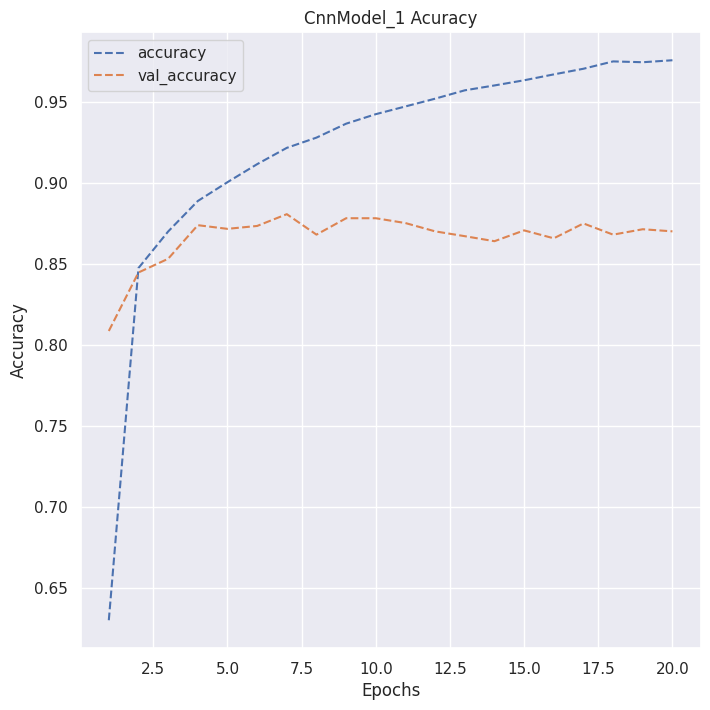

In [ ]:
# plotting the accuracies

dict_hist = history_cnnmodel_1.history
list_ep = [i for i in range(1,21)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('CnnModel_1 Acuracy')
plt.legend()
plt.show()

**Observations:**
* We observe that the training accuracy is continuously improving, from 0.63 to 0.98. However, the validation accuracy performs poorly. It increases steadily at the first 4 epochs, but after that it become constant with accuracy of 0.87 at the end.
* The above observation indicates that the model is overfitting on the training data.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
from keras import backend
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
cnn_model_2 = Sequential()
#Add layers as per the architecture mentioned above in the same sequence
cnn_model_2.add(Conv2D(filters=16, kernel_size=(3, 3), padding="same", input_shape=(32, 32, 1)))
cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(MaxPool2D(pool_size=(2, 2)))
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))

cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(MaxPool2D(pool_size=(2, 2)))
cnn_model_2.add(BatchNormalization())
cnn_model_2.add(Flatten())
cnn_model_2.add(Dense(32))
cnn_model_2.add(LeakyReLU(0.1))
cnn_model_2.add(Dropout(0.5))
cnn_model_2.add(Dense(10, activation='softmax'))


adam = optimizers.Adam(learning_rate = 0.001)

#compile the model
cnn_model_2.compile(loss = 'categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

#Print the summary
cnn_model_2.summary()





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
# Fit the model
history_cnnmodel_2 = cnn_model_2.fit(
            X_train, y_train_encoded,
            epochs=30,
            validation_split=0.2,
            batch_size = 128,
            verbose=1)

Epoch 1/30
263/263 [==============================] - 125s 469ms/step - loss: 1.3222 - accuracy: 0.5483 - val_loss: 2.1225 - val_accuracy: 0.2112
Epoch 2/30
263/263 [==============================] - 134s 511ms/step - loss: 0.6654 - accuracy: 0.7950 - val_loss: 0.6373 - val_accuracy: 0.8208
Epoch 3/30
263/263 [==============================] - 139s 528ms/step - loss: 0.5528 - accuracy: 0.8313 - val_loss: 0.4480 - val_accuracy: 0.8737
Epoch 4/30
263/263 [==============================] - 143s 543ms/step - loss: 0.4908 - accuracy: 0.8507 - val_loss: 0.3992 - val_accuracy: 0.8823
Epoch 5/30
263/263 [==============================] - 118s 450ms/step - loss: 0.4349 - accuracy: 0.8633 - val_loss: 0.3909 - val_accuracy: 0.8885
Epoch 6/30
263/263 [==============================] - 113s 428ms/step - loss: 0.4038 - accuracy: 0.8755 - val_loss: 0.4107 - val_accuracy: 0.8852
Epoch 7/30
263/263 [==============================] - 109s 413ms/step - loss: 0.3835 - accuracy: 0.8814 - val_loss: 0.3952 -

### **Plot the Training and Validation accuracies and write your observations.**

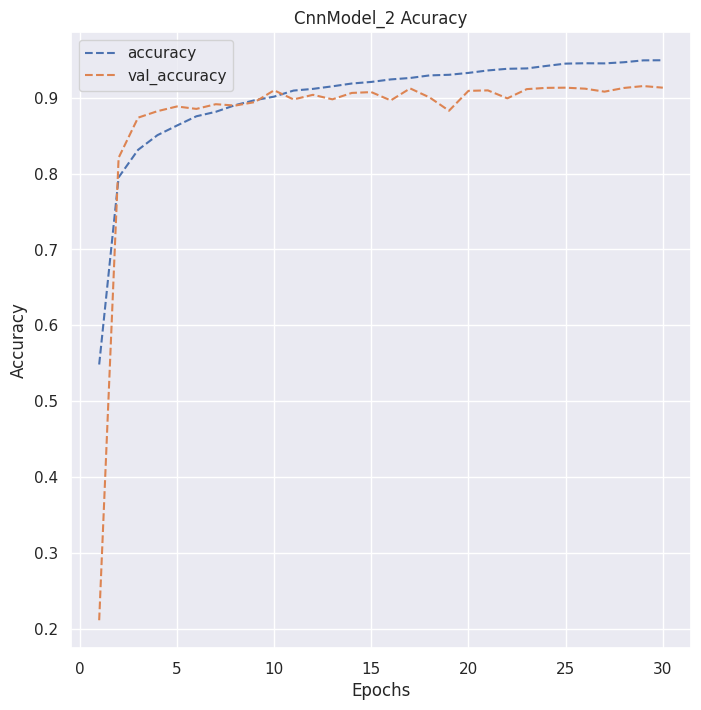

In [ ]:
# plotting the accuracies

dict_hist = history_cnnmodel_2.history
list_ep = [i for i in range(1,31)]

plt.figure(figsize = (8,8))
plt.plot(list_ep,dict_hist['accuracy'],ls = '--', label = 'accuracy')
plt.plot(list_ep,dict_hist['val_accuracy'],ls = '--', label = 'val_accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.title('CnnModel_2 Acuracy')
plt.legend()
plt.show()

**Observations:**
* Comparing with the previous CNN model, the 2nd CNN model greatly reduced the overfitting, Although demostrating slightly higher training data accuracy than the validation data accuracy.
* The training data accuracy increases rapidly until epoch 5, and then with slower increase rate of accuracy. The validation dataset increases with a steep slope until epoch 3, and then with a slower increase rate and some ups and downs demostrating the constent increasing trend.
* After 30 epochs, the accuracy on the training data is about 0.95 and the validation accuracy is around 0.91.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
#Make prediction on the test data using model_2
y_pred_test = cnn_model_2.predict(X_test)

# Converting probabilities to class labels
y_pred_test_classes = np.argmax(y_pred_test, axis = 1)


# Calculating the probability of the predicted class
#y_pred_test_max_probas = np.max(y_pred_test, axis = 1)


563/563 [==============================] - 15s 26ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
#Converting each entry to single label from one-hot encoded vector
y_test = np.argmax(y_test_encoded, axis=-1)

### **Write final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1814
           1       0.92      0.90      0.91      1828
           2       0.93      0.93      0.93      1803
           3       0.89      0.90      0.89      1719
           4       0.93      0.92      0.92      1812
           5       0.91      0.91      0.91      1768
           6       0.89      0.90      0.90      1832
           7       0.94      0.93      0.93      1808
           8       0.92      0.88      0.90      1812
           9       0.92      0.90      0.91      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



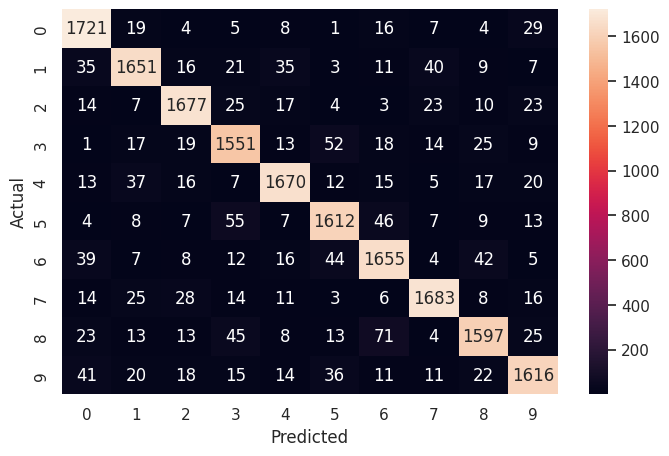

In [ ]:
#importing required functions
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Printing the classification report
print(classification_report(y_test, y_pred_test_classes))

#Plotting the heatmap using confusion matrix
cm = confusion_matrix(y_test, y_pred_test_classes)
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True,  fmt='.0f')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

**Final Observations:**

* The model gaves 0.91 accuracy on the test data, with almost the same accuracy on the validation dataset, indicating the reliability of the model.
* The high range of the recall rate indicates the model is good at identifying most of the objects. The model did the best job identifying 0 and relatively worse perfomance identifying 8. We do not raise serious concern for the confusion on identifying between numbers.

* OVerall, CNN models outperforms the ANN model when identifying these digit images, and the second CNN model does the best job comparing all of the previous models.
